In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Longitud de la señal, $N$, y vectores de valores de $n$ y de $k$.

In [2]:
N = 16
nn = np.arange(0, N)
kk = np.arange(0, N)

Un periodo de la señal $\tilde x[n] = \sum_{r=-\infty}^{\infty}\delta(n-rN)$

In [3]:
xs = (nn == 0).astype(np.float_)

Desarrollo en serie de Fourier de $\tilde x[n]$:
$$\tilde X[k] = \sum_{n=0}^{N-1} \tilde x[n]\rm{e}^{\rm{j}\frac{2\pi k}{N}n}$$

In [4]:
Xk = np.zeros(N, np.complex_)
for k0 in np.arange(0, N):
    Xk[k0] = np.sum(xs*np.exp(-1j*(2*np.pi*k0/N)*nn))

Desarrollo inverso (síntesis):

In [5]:
N = 100
def sf(M=2):
    M = int(M)
    nn = np.arange(0, N)
    xs = np.r_[[-1]*int(N/4), [1]*int(N/2), [-1]*int(N/4)] # 2*(nn <= N/2).astype(np.float_)-1.0
    kk = np.arange(0, N)
    Xk = np.zeros(N, np.complex_)
    for k0 in range(N):
        Xk[k0] = np.sum(xs*np.exp(-1j*(2*np.pi*k0/N)*nn))
    xs2 = np.zeros(N, np.complex_)
    for n0 in range(N):
        for k0 in np.arange(M):
            if k0 != N/2:
                xs2[n0] += (1/N)*Xk[k0]*np.exp(1j*(2*np.pi*k0/N)*n0)
        for k0 in range(-M+1, 0):
            xs2[n0] += (1/N)*Xk[k0]*np.exp(1j*(2*np.pi*k0/N)*n0)
    plt.figure(figsize=(20, 4))
    plt.stem(nn, np.real(xs2))
    plt.axis([nn[0]-0.5, nn[-1]+0.5, -1.4, 1.4])
    plt.grid(True)

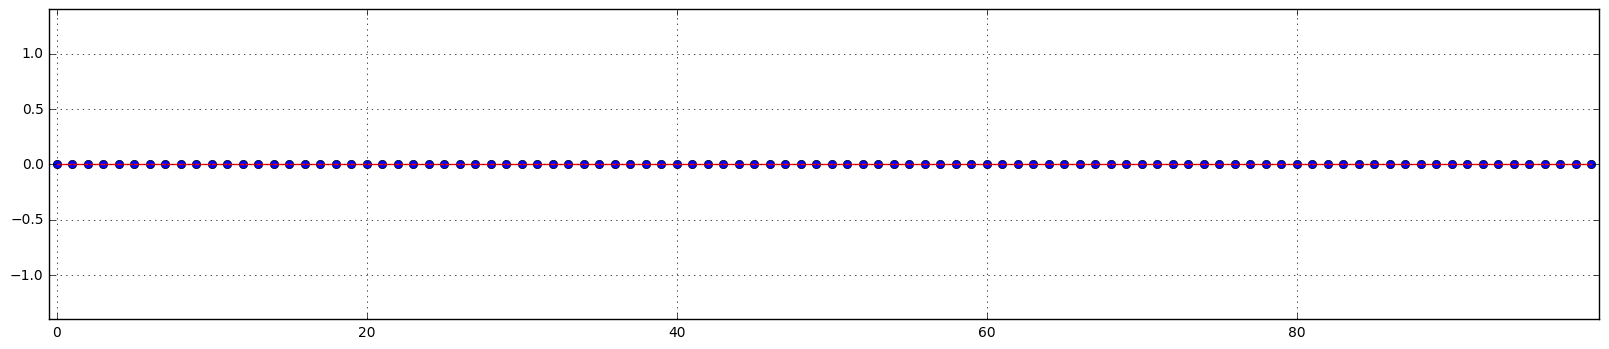

In [6]:
from ipywidgets import interact
interact(sf, M=(1, 1+(N/2), 2))